In [1]:
# import pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets, utils
from torch.utils import data

import numpy as np
import matplotlib.pyplot as plt

In [2]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [3]:
transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])

In [4]:
# Download Dataset
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

In [5]:
BATCH_SIZE = 64

# Load Dataset
train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
)

test_loader = torch.utils.data.DataLoader(
    dataset     = testset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
)

In [6]:
class CNNet(nn.Module):
    def __init__(self):
        super(CNNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return x

In [7]:
def train_cnn(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

#         if batch_idx % 200 == 0:
#             print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
#                 epoch, batch_idx * len(data), len(train_loader.dataset),
#                 100. * batch_idx / len(train_loader), loss.item()))

In [8]:
def evaluate_cnn(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            # 배치 오차를 합산
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()

            # 가장 높은 값을 가진 인덱스가 바로 예측값
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [9]:
model     = CNNet().to(DEVICE)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [10]:
EPOCHS = 300

x_epoch_cnn = []
y_loss_cnn = []
y_accuracy_cnn = []

for epoch in range(1, EPOCHS + 1):
    train_cnn(model, train_loader, optimizer, epoch)
    test_loss, test_accuracy = evaluate_cnn(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))
    
    x_epoch_cnn.append(epoch)
    y_loss_cnn.append(test_loss)
    y_accuracy_cnn.append(test_accuracy)

[1] Test Loss: 0.6601, Accuracy: 73.93%
[2] Test Loss: 0.5784, Accuracy: 77.17%
[3] Test Loss: 0.5406, Accuracy: 78.86%
[4] Test Loss: 0.5190, Accuracy: 80.95%
[5] Test Loss: 0.4793, Accuracy: 82.28%
[6] Test Loss: 0.4750, Accuracy: 82.43%
[7] Test Loss: 0.4602, Accuracy: 83.27%
[8] Test Loss: 0.4415, Accuracy: 84.13%
[9] Test Loss: 0.4264, Accuracy: 84.13%
[10] Test Loss: 0.4158, Accuracy: 84.67%
[11] Test Loss: 0.4084, Accuracy: 85.25%
[12] Test Loss: 0.3969, Accuracy: 85.37%
[13] Test Loss: 0.3912, Accuracy: 85.48%
[14] Test Loss: 0.3821, Accuracy: 86.08%
[15] Test Loss: 0.3787, Accuracy: 86.21%
[16] Test Loss: 0.3769, Accuracy: 86.23%
[17] Test Loss: 0.3681, Accuracy: 86.41%
[18] Test Loss: 0.3632, Accuracy: 86.58%
[19] Test Loss: 0.3617, Accuracy: 86.60%
[20] Test Loss: 0.3598, Accuracy: 86.99%
[21] Test Loss: 0.3524, Accuracy: 87.06%
[22] Test Loss: 0.3492, Accuracy: 87.27%
[23] Test Loss: 0.3529, Accuracy: 86.88%
[24] Test Loss: 0.3483, Accuracy: 87.20%
[25] Test Loss: 0.3416, A

[199] Test Loss: 0.2890, Accuracy: 89.66%
[200] Test Loss: 0.2824, Accuracy: 89.79%
[201] Test Loss: 0.2882, Accuracy: 89.22%
[202] Test Loss: 0.2975, Accuracy: 89.01%
[203] Test Loss: 0.2913, Accuracy: 89.34%
[204] Test Loss: 0.2821, Accuracy: 89.92%
[205] Test Loss: 0.2828, Accuracy: 89.80%
[206] Test Loss: 0.2879, Accuracy: 89.57%
[207] Test Loss: 0.2885, Accuracy: 89.43%
[208] Test Loss: 0.2891, Accuracy: 89.70%
[209] Test Loss: 0.2941, Accuracy: 89.25%
[210] Test Loss: 0.2852, Accuracy: 89.64%
[211] Test Loss: 0.2848, Accuracy: 89.71%
[212] Test Loss: 0.2859, Accuracy: 89.71%
[213] Test Loss: 0.2885, Accuracy: 89.47%
[214] Test Loss: 0.2829, Accuracy: 89.83%
[215] Test Loss: 0.2835, Accuracy: 89.64%
[216] Test Loss: 0.2839, Accuracy: 89.76%
[217] Test Loss: 0.2920, Accuracy: 89.03%
[218] Test Loss: 0.2895, Accuracy: 89.34%
[219] Test Loss: 0.2903, Accuracy: 89.31%
[220] Test Loss: 0.2813, Accuracy: 89.89%
[221] Test Loss: 0.2865, Accuracy: 89.72%
[222] Test Loss: 0.2845, Accuracy:

Text(0.5, 1.0, 'Test Accuracy')

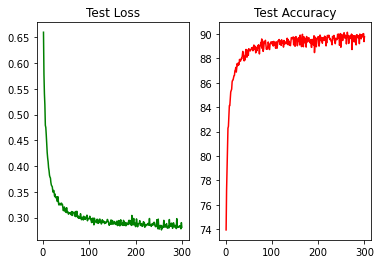

In [11]:
plt.subplot(1,2,1)
plt.plot(x_epoch_cnn, y_loss_cnn, color = 'green')
plt.title('Test Loss')

plt.subplot(1,2,2)
plt.plot(x_epoch_cnn, y_accuracy_cnn, color = 'red')
plt.title('Test Accuracy')

Text(0.5, 1.0, 'Test Loss')

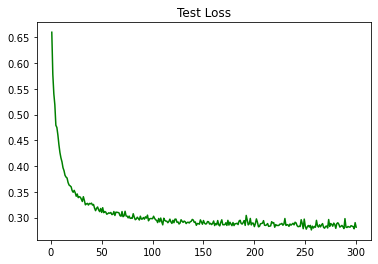

In [12]:
plt.plot(x_epoch_cnn, y_loss_cnn, color = 'green')
plt.title('Test Loss')


Text(0.5, 1.0, 'Test Accuracy')

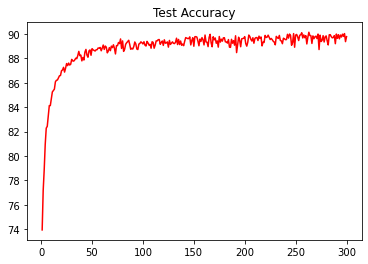

In [13]:
plt.plot(x_epoch_cnn, y_accuracy_cnn, color = 'red')
plt.title('Test Accuracy')
